<a href="https://colab.research.google.com/github/slvDev/Malaria-Detection-CNN-Keras/blob/master/Malaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import zipfile
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
zip_ref_train = zipfile.ZipFile("/content/drive/My Drive/cell-images-for-detecting-malaria.zip", 'r')
zip_ref_train.extractall("/content")
zip_ref_train.close()

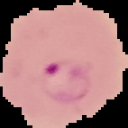

In [0]:
img_size = 128
dim = img_size, img_size
img = cv2.imread('/content/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png')
img = cv2.resize(img, (dim))
cv2_imshow(img)

In [0]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=90,
        shear_range=0.25,
        #zoom_range=0.2,
        vertical_flip=True,
        horizontal_flip=True,
        validation_split=0.2,
        )

train_generator = train_datagen.flow_from_directory(
        '/content/cell_images',  
        target_size=dim, 
        batch_size=16,
        #color_mode='grayscale',
        class_mode='binary',
        subset='training',
        )

valid_generator = train_datagen.flow_from_directory(
        '/content/cell_images',  
        target_size=dim, 
        batch_size=16,
        #color_mode='grayscale',
        class_mode='binary',
        subset='validation',
        )

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(1024, activation='relu'),  
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

In [0]:
history = model.fit_generator(
      train_generator,
      #steps_per_epoch=steps_per_epoch,
      epochs=40,
      #verbose=1,
      validation_data=valid_generator,
      #validation_steps=validation_steps,
      shuffle=True
      )

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
1378/1378 [==============================] - 173s 125ms/step - loss: 0.3224 - acc: 0.9102 - val_loss: 0.2488 - val_acc: 0.9377
Epoch 2/40
1378/1378 [==============================] - 166s 121ms/step - loss: 0.1683 - acc: 0.9521 - val_loss: 0.1905 - val_acc: 0.9456
Epoch 3/40
1378/1378 [==============================] - 164s 119ms/step - loss: 0.1615 - acc: 0.9555 - val_loss: 0.1749 - val_acc: 0.9446
Epoch 4/40
1378/1378 [==============================] - 165s 119ms/step - loss: 0.1572 - acc: 0.9552 - val_loss: 0.2404 - val_acc: 0.9283
Epoch 5/40
1378/1378 [==============================] - 164s 119ms/step - loss: 0.1652 - acc: 0.9545 - val_loss: 0.1675 - val_acc: 0.9423
Epoch 6/40
1378/1378 [==============================] - 164s 119ms/step - loss: 0.1571 - acc: 0.9558 - val_loss: 0.2075 - val_acc: 0.9472
Epoch 7/40
1378/1378 [==============================] - 163s 118ms/step - loss: 0.1520 - acc: 0.9561 - val_loss: 0.1593 - va

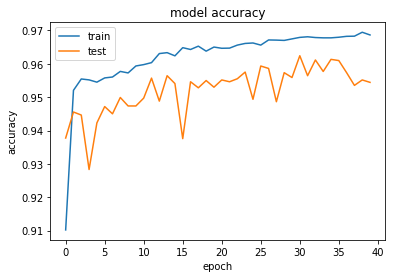

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

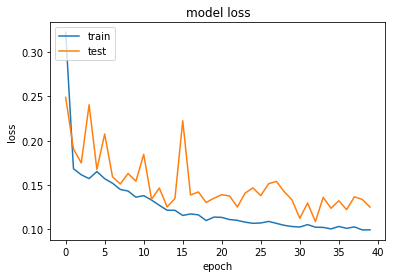

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()